<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6311 entries, 0 to 6310
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6311 non-null   object 
 1   [Australian dollar ]      6311 non-null   object 
 2   [Bulgarian lev ]          5909 non-null   object 
 3   [Brazilian real ]         6043 non-null   object 
 4   [Canadian dollar ]        6311 non-null   object 
 5   [Swiss franc ]            6311 non-null   object 
 6   [Chinese yuan renminbi ]  6043 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6311 non-null   object 
 9   [Danish krone ]           6311 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6311 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6311 non-null   object 
 14  [Croatia

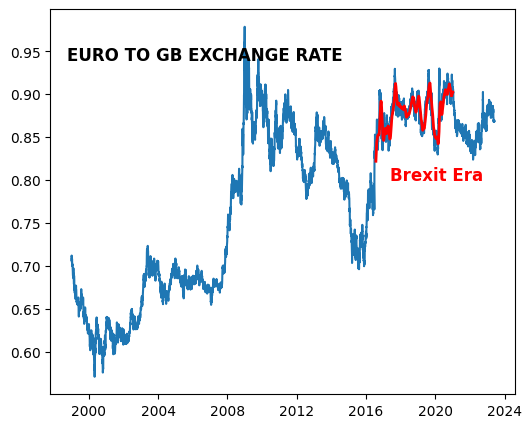

/var/folders/sk/q08ddwp118g9tgnt896qm1pm0000gn/T/ipykernel_75599/2041143060.py:78: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.plot(referendum.iloc[0][0], referendum.iloc[2][2], 'o', ms=10, mfc='none', mew=2, mec='#ffa500')


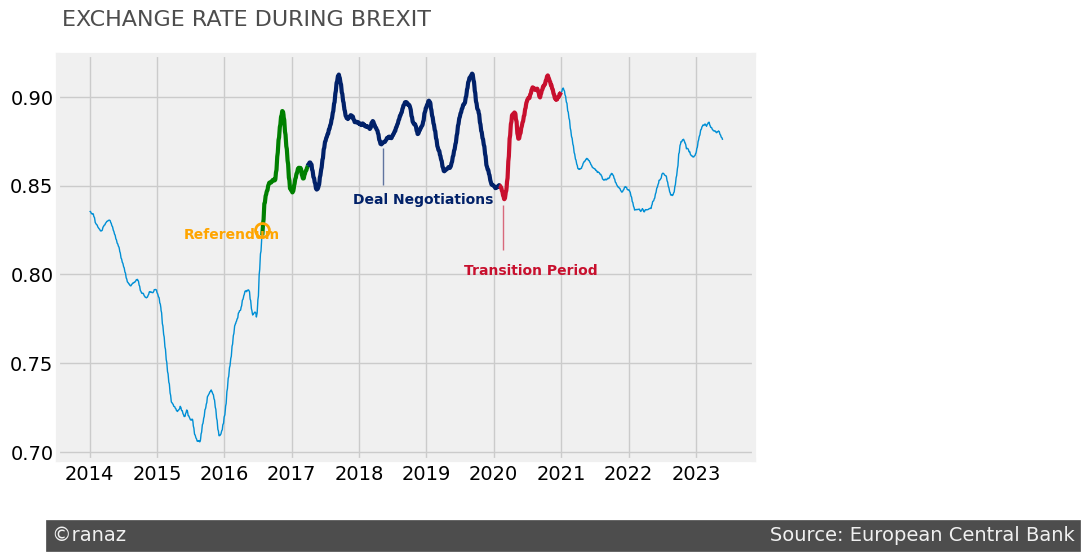

In [1]:
import pandas as pd
import datetime

import matplotlib.pyplot as plt


import matplotlib.style as style 

exchange_rates = pd.read_csv('Eur_to_GB.csv')

exchange_rates.head()
exchange_rates.info()
exchange_rates.rename(columns={'[UK pound sterling ]': 'GB_Pounds', 'Period\\Unit:': 'Time'}, inplace=True)

exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)
euro_gbpounds = exchange_rates[['Time','GB_Pounds']]
euro_gbpounds.head()
euro_gbpounds['GB_Pounds'].value_counts()
euro_gbpounds = euro_gbpounds[euro_gbpounds['GB_Pounds'] != '-']
euro_gbpounds['GB_Pounds'] = euro_gbpounds['GB_Pounds'].astype(float)
euro_gbpounds.info()

fig, bx = plt.subplots(figsize=(6,5))

euro_gbpounds['rolling_mean'] = euro_gbpounds['GB_Pounds'].rolling(30).mean()
brexit = euro_gbpounds.copy()[(euro_gbpounds['Time'].dt.year >= 2014)]

brexit_starts = datetime.datetime(2016, 7, 23)
brexit_end = datetime.datetime(2020, 12, 31)
brexit_period = euro_gbpounds[(euro_gbpounds['Time'] >= brexit_starts) & (euro_gbpounds['Time'] <= brexit_end)]

bx.text(10500, .94, 'EURO TO GB EXCHANGE RATE',weight='bold', size=12, color='black')
plt.plot(euro_gbpounds['Time'],
         euro_gbpounds['GB_Pounds'])
bx.plot(brexit_period['Time'], brexit_period['rolling_mean'], linewidth=2, color='red')

bx.text(17300, 0.80, 'Brexit Era', color='red', weight='bold', size=12)
plt.show()


referendum_starts = datetime.datetime(2016, 7, 23)
referendum_end = datetime.datetime(2017, 3, 29)
refeendum_period = brexit[(brexit['Time'] >= referendum_starts) & (brexit['Time'] <= referendum_end)]

referendum = brexit[brexit['Time'] >= referendum_starts]

negotiation_start = datetime.datetime(2017, 3, 29)
negotiation_end = datetime.datetime(2020, 1, 31)
deal_negotiation = brexit[(brexit['Time'] >= negotiation_start) & (brexit['Time'] <= negotiation_end)]


transition_start = datetime.datetime(2020, 1, 31)
transition_end = datetime.datetime(2020, 12, 31)
transition_period = brexit[(brexit['Time'] >= transition_start) & (brexit['Time'] <= transition_end)]



style.use('fivethirtyeight')


fig, ax = plt.subplots(figsize=(8,5), facecolor='white')

ax.plot(brexit['Time'], brexit['rolling_mean'], linewidth=1)

ax.plot(refeendum_period['Time'], refeendum_period['rolling_mean'], linewidth=3, color='green')

ax.plot(deal_negotiation['Time'], deal_negotiation['rolling_mean'], linewidth=3, color='#012169')

ax.plot(transition_period['Time'], transition_period['rolling_mean'], linewidth=3, color='#C8102E')

# Title and a subtitle 

ax.text(15920, .94, 'EXCHANGE RATE DURING BREXIT', size=16, color='#4d4d4d')

# Adding events: Referendum, Deal Negotiation and Transition Period
ax.plot(referendum.iloc[0][0], referendum.iloc[2][2], 'o', ms=10, mfc='none', mew=2, mec='#ffa500')
ax.text(16580, 0.82, 'Referendum', color='#ffa500', weight='bold', size=10)

ax.axvline(17660, c='#012169', alpha=0.6, linewidth=1,ymin=0.77, ymax=0.68)
ax.text(17500, 0.84, 'Deal Negotiations', color='#012169', weight='bold', size=10)

ax.axvline(18310, c='#C8102E', alpha=0.6, linewidth=1,ymin=0.63, ymax=0.52)
ax.text(18100, 0.80, 'Transition Period', color='#C8102E', weight='bold', size=10)

### Adding a signature
ax.text(15865, 0.65, '©ranaz' + ' '*103 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=14)


plt.show()